# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**

## Section 01: Working with various omic data types (40 min)

🕒 Time: 8:00 - 8:40 EDT | 📅 June 17, 2025

Welcome to the practical session 01.
Created by professor Qiyun Zhu and adapted by Nelly Selem (Secodment host), Jeanett Daga (Secodment) for CABANA.

--- 

🏆 **QUESTIONS**

Why is important understand the format files in biologic data?

🎯 **AIMS**

1. To use scikit-bio for importing, processing, and integrating diverse file formats (biom, csv, tsv, fa, nwk format) along with associated metadata, ensuring data compatibility and readiness for downstream microbiome and metabolomic analyses.
2. To extract Latin American samples from the EMP500 dataset and process data in TSV, BIOM, FASTA, and other formats into unified tables for appropriate visualization using Google Colab, ensuring accurate data management and preparation for subsequent analyses.

🔑 **KEY POINTS** 

* EMP500 project
* Multi-omics data

---

📥 **Input**: Multi-omic dataset from EMP500 project

* 16S rRNA gene amplicon data (taxonomic composition)
* Shotgun metagenomics (functional and genomic potential)
* Untargeted metabolomics (metabolite-level biochemical activity)

📤 **Output**:

* Subset data from Latin American samples.

--- 

## **Omics in Microbiome Research**

[**Omics**](https://en.wikipedia.org/wiki/Omics) refers to the study of biological systems at scale, characterizing the totality of molecules (e.g., DNA, RNA, proteins), cells, or organisms within a sample. These approaches rely on high-throughput technologies—such as DNA sequencing and mass spectrometry—coupled with bioinformatics to reveal the structure, function, and dynamics of biological entities.

In microbiome research, isolating and culturing all microbes from an environment is often impractical. Omics techniques are thus indispensable for profiling microbiomes (a term inherently reflecting this holistic nature). The prefix "**meta-**" denotes the study of collective molecular profiles from *all* microorganisms in a given environment (e.g., [metagenomics](https://en.wikipedia.org/wiki/Metagenomics)). Integrating microbiota omics with host or environmental omics enables a systems-level understanding.

Common omics types for host and microbiota studies include:

| Molecule | DNA | RNA | Protein | Metabolites |
|----------|----|-----|--------|-------------|
| (Host) ome | genome | transcriptome | proteome | metabolome |
| (Microbiota) ome | metagenome | metatranscriptome | metaproteome | (meta)metabolome |

In this section, we use data from the **Earth Microbiome Project 500** ([EMP500](https://earthmicrobiome.org/emp500/)), to explore multi-omic workflows. We will:

1. Navigate omics-specific data tables and file formats.
2. Address computational challenges and solutions.
3. Compare insights across omics layers.

This foundation will support downstream analyses in subsequent sections.

---

## Preparation (7 min)

Check if **scikit-bio** is installed. If not, install the latest version of scikit-bio in your **Google Colab** instance.

In [1]:
# Import find_spec function
from importlib.util import find_spec

In [ ]:
# Check if skbio is not installed
if find_spec('skbio') is None:
    # Install scikit-bio if not installed
    !pip install -q scikit-bio

_The installation of **scikit-bio** (cell [2]) takes approximately 3 minutes. It is recommended to run it immediately after starting the workshop, while the instructor explains the content of the following cells._

In [3]:
# Import the skbio library and check the version. 
import skbio
print(f"scikit-bio version: {skbio.__version__}")

scikit-bio version: 0.6.3


In [4]:
# Import the pandas library and check the version. 
import pandas as pd
print(f"pandas version: {pd.__version__}")

pandas version: 2.2.3


## The EMP500 study (7 min)

The dataset includes a `README.md` file in the data directory containing key study information. Below is a summary:

The EMP500 project was published in:
[Nature Microbiology](https://www.nature.com/nmicrobiol/) **7**, 2128-2150 (2022)

[Standardized multi-omics of Earth’s microbiomes reveals microbial and metabolite diversity](https://www.nature.com/articles/s41564-022-01266-x)

This landmark study conducted multi-omic analyses on **880** globally distributed samples spanning diverse ecosystems - from free-living environments to host-associated microbiomes. Researchers employed:

1. **Amplicon sequencing**: Targeting taxonomic markers (16S, 18S, ITS rRNA genes)
2. **Shotgun metagenomics**: With functional profiling via assembly
3. **Untargeted metabolomics**: Using both LC-MS and GC-MS platforms

By integrating these complementary omics layers with environmental metadata, the team revealed:

* Universal microbial-metabolite relationships
* Ecosystem-specific interaction patterns

![image.png](https://github.com/nselem/biotraintemp/blob/main/figures/EMP.png?raw=true)

_**Figure 1**: Distribution of samples (n = 880) among the Earth Microbiome Project Ontology (EMPO) categories. Linked from Fig. 1 of [Shaffer et al. (2022)](https://www.nature.com/articles/s41564-022-01266-x)._

### **Metadata in Omics Studies**

[**Metadata**](https://en.wikipedia.org/wiki/Metadata) ("data about data") describes the context and characteristics of primary datasets. In omic research, **sample metadata** documents critical attributes of biological specimens, including:

* Demographic characteristics
* Morphological/clinical measurements
* Behavioral/environmental parameters
* Experimental conditions

**Why metadata matters**:

As the foundational framework for biological interpretation, sample metadata takes precedence over raw omic data. Without it, researchers face mere numerical outputs devoid of biological meaning or hypothesis-testing capacity.

**Feature metadata** provides complementary information about the measured biological entities (genes, metabolites, taxa, etc.).

**Accessing the Metadata**:

The sample metadata is provided in `sample.tsv`, a [TSV](https://en.wikipedia.org/wiki/Tab-separated_values) (tab-separated values) file structured as:

* Rows: Individual biological samples
* Columns: Sample attributes/properties

Let's examine the table structure:

In [5]:
# Base URL of GitHub repository containing the data
github_data_path = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"

# Construct full path to metadata file (TSV format)
metadata_path = github_data_path + "emp500/sample.tsv"

In [6]:
# Load metadata using pandas:
sample_df = pd.read_csv(
    metadata_path, 
    sep='\t',                                   # Specifies tab-separated values (TSV format)
    low_memory=False,                           # Avoids memory issues with large files
    index_col='sample_name'                     # Sets 'sample_name' as the index column
)

# Display first rows of DataFrame (only first 6 columns) to verify successful data loading
print("Metadata preview (first 6 columns):")
print(sample_df.iloc[:, :6].head())

Metadata preview (first 6 columns):
                        sample_name_original        sample_type  \
sample_name                                                       
13114.angenent.65.s001   Angenent65.misc.104  bioreactor sludge   
13114.angenent.65.s002   Angenent65.misc.519  bioreactor sludge   
13114.angenent.65.s003   Angenent65.misc.946  bioreactor sludge   
13114.angenent.65.s004  Angenent65.misc.1022  bioreactor sludge   
13114.angenent.65.s005  Angenent65.misc.1538  bioreactor sludge   

                       collection_timestamp         country    depth_sample  \
sample_name                                                                   
13114.angenent.65.s001      08/09/2011 0:00  USA - New York  not applicable   
13114.angenent.65.s002         9/27/12 0:00  USA - New York  not applicable   
13114.angenent.65.s003        11/28/13 0:00  USA - New York  not applicable   
13114.angenent.65.s004      02/12/2014 0:00  USA - New York  not applicable   
13114.angenent.65.s0

### The `SampleMetadata` class in scikit-bio

**scikit-bio** provides a specialized [`SampleMetadata`](https://scikit.bio/docs/latest/generated/skbio.metadata.SampleMetadata.html) class designed for robust handling of sample metadata. This class:

* **Origins**: Originally ported from [**QIIME 2**](https://qiime2.org/), the gold-standard microbiome analysis platform
* **Familiarity**: Maintains API compatibility for users transitioning from **QIIME 2**
* **Active Development**: The scikit-bio team is expanding its functionality beyond the original **QIIME 2** implementation

We'll now convert our `sample_df` DataFrame into a `SampleMetadata` object:


In [7]:
# Import SampleMetadata class from skbio.metadata
from skbio.metadata import SampleMetadata

**Advantages of the `SampleMetadata` Class**

The `SampleMetadata` class implements standardized parsing rules for biological metadata, addressing common challenges in omics research:

**Handling Missing Data**

[Missing data](https://en.wikipedia.org/wiki/Missing_data) are ubiquitous in biological datasets and require careful interpretation. The class adopts the [**International Nucleotide Sequence Database Collaboration (INSDC)**](https://www.insdc.org/) standards for missing value reporting:

### INSDC Missing Data Terminology (Simplified)

| Top-Level Term   | Reporting-Level Term      | Definition                                                                 |
|------------------|---------------------------|----------------------------------------------------------------------------|
| not applicable   | control sample            | Information is irrelevant (e.g., negative control samples).                |
| not applicable   | sample group              | Samples lack a single origin (e.g., co-assemblies).                        |
| not collected    | synthetic construct       | Data doesn't exist (e.g., ab-initio synthetic constructs).                 |
| not collected    | lab stock                 | Applies to cultured cell lines/model organisms under lab control.          |
| not collected    | third party data          | Legacy data predating 2023 metadata standards.                             |
| not provided     | data agreement pre-2023   | Data exists but is withheld due to pre-2023 agreements.                    |
| restricted access| endangered species        | Data withheld due to IUCN Red List status.                                 |
| restricted access| human-identifiable        | Metadata could compromise human subject privacy.                           |


Reference:
[**INSDC Missing Value Reporting Terms**](https://www.insdc.org/technical-specifications/missing-value-reporting/)

**Key Benefits**

* **Reproducibility**: Ensures consistent interpretation of missing data
* **Interoperability**: Aligns with international database standards
* **Traceability**: Documents why data is missing rather than using empty values

In [8]:
# Create a SampleMetadata object from the pandas DataFrame
meta = SampleMetadata(
    dataframe=sample_df,
    default_missing_scheme='INSDC:missing')
meta

SampleMetadata
--------------
880 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type=

**Working with Metadata in Pandas and scikit-bio**

The metadata table can be loaded and analyzed using Pandas, with full interoperability in scikit-bio's ecosystem. Key operations include:

**Accessing Metadata Columns**

To extract a specific metadata column by name:

In [9]:
empo_2 = meta.get_column('empo_2')
empo_2

<CategoricalMetadataColumn name='empo_2' id_count=880>

Note: The output is a [`MetadataColumn`](https://scikit.bio/docs/latest/generated/skbio.metadata.MetadataColumn.html) object - scikit-bio's optimized container for metadata vectors.

For example, The empo_2 column contains:

* Environment classification following the level 2 Earth Microbiome Project Ontology ([EMPO](https://earthmicrobiome.org/protocols-and-standards/empo/))
* Standardized categories: e.g., "Soil", "Animal surface", "Plant rhizosphere"
* Ecological context: Critical for cross-study comparisons of microbial habitats

Likewise, a metadata column can be converted to a Pandas Series object for further analysis:

In [10]:
# Convert the EMPO 2 column to a pandas Series
s_empo_2 = empo_2.to_series()
s_empo_2

sample_name
13114.angenent.65.s001    Animal
13114.angenent.65.s002    Animal
13114.angenent.65.s003    Animal
13114.angenent.65.s004    Animal
13114.angenent.65.s005    Animal
                           ...  
13114.zaneveld.9.s018     Animal
13114.zaneveld.9.s019     Animal
13114.zaneveld.9.s020     Animal
13114.zaneveld.9.s021     Saline
13114.zaneveld.9.s022     Saline
Name: empo_2, Length: 880, dtype: object

Using Pandas, one can further explore the distrubution of values

In [11]:
# Count the frequency of each unique value in the EMPO 2 column
empo_2_freqs = s_empo_2.value_counts()
empo_2_freqs

empo_2
Non-saline    343
Animal        301
Plant         115
Saline        109
Fungus         12
Name: count, dtype: int64

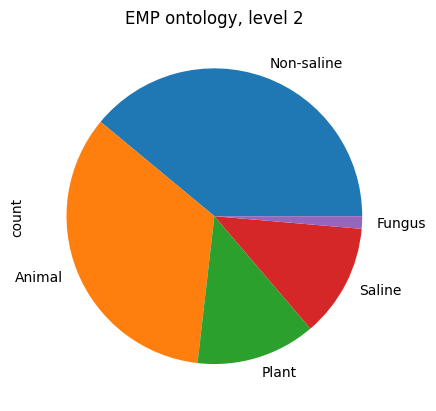

In [12]:
# Make a pie chart of the EMPO 2 frequencies
empo_2_freqs.plot.pie(title='EMP ontology, level 2');

**Converting Between Formats**

To conclude this section, we highlight that a `SampleMetadata` object can be seamlessly converted back to a **pandas** `DataFrame` when needed:

In [13]:
# Convert SampleMetadata object to a pandas DataFrame
df_metadata = meta.to_dataframe()
df_metadata.head(5)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.angenent.65.s001,Angenent65.misc.104,bioreactor sludge,08/09/2011 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s002,Angenent65.misc.519,bioreactor sludge,9/27/12 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s003,Angenent65.misc.946,bioreactor sludge,11/28/13 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s004,Angenent65.misc.1022,bioreactor sludge,02/12/2014 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s005,Angenent65.misc.1538,bioreactor sludge,7/13/15 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.1538,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


## Filtering metadata from **Latino America** (7 min)

### Exercise 1: Filtering Latin American Samples (Beginner Level)

**Objective**: Use Colab's AI assistant to filter metadata for samples collected in **Latin America**.
Step-by-Step Instructions:

1. Create a new code cell
    * Click the + Code (+ Código) button in the toolbar
2. Activate AI assistance
    * Click the ✨ Generate with AI (Generar con IA) button that appears
3. Enter the AI prompt:
    * "*Filter the `meta` object to keep only samples from Latin American countries (latam_countries)*"
4. Execute the code:
    * Press `Ctrl+Enter` (Windows/Linux) or `⌘+Enter` (Mac) to run the cell

**Expected Output:**
A filtered `DataFrame` containing only samples where `latam_countries == True`


### Exercise Solution

**Expected Output**:

After running the filtering operation, your resulting `DataFrame` should contain **92 samples** from **Latin America**.

**Next Steps**:

Proceed to run the subsequent cells in the notebook

This ensures all participants are working with the same filtered dataset

**Data Selection for Workshop**

For this workshop's analysis, we will focus exclusively on samples collected in **Latin American countries**.

**Implementation**:

We will first define our geographic filter by creating a list of Latin American countries:

In [14]:
# Create a list of countries in Latin America
latam_countries =  [
    'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua',
    'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Ecuador', 'Peru',
    'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'Brazil', 'Cuba',
    'Dominican Republic', 'Puerto Rico', 'Haiti'
]
latam_countries

['Mexico',
 'Guatemala',
 'Honduras',
 'El Salvador',
 'Nicaragua',
 'Costa Rica',
 'Panama',
 'Colombia',
 'Venezuela',
 'Ecuador',
 'Peru',
 'Bolivia',
 'Paraguay',
 'Chile',
 'Argentina',
 'Uruguay',
 'Brazil',
 'Cuba',
 'Dominican Republic',
 'Puerto Rico',
 'Haiti']

In [15]:
# Create a dataframe with samples from Latin America, filtering the original dataframe
# based on the 'country' column and the list of Latin American countries
latam_samples = df_metadata[sample_df['country'].isin(latam_countries)]
latam_samples.head()

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,NaN,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,NaN,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s014,Jensen43.MX12.236,sediment,07/05/2010,Mexico,15,Jensen43.sediment.14,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-236,NaN,18.75917,-87.34052,Jensen sediments from global ocean,marine sediment metagenome
13114.pinto.62.s001,Pinto62.excavatedsoil.1,soil,5/21/16 0:00,Costa Rica,0,Soil excavated by the ants,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,excavated soil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome
13114.pinto.62.s002,Pinto62.undisturbedsoil.1,soil,5/21/16 0:00,Costa Rica,0,Soil not associated with the ant nest,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,undisturbedsoil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome


In [16]:
# Create a SampleMetadata object from the pandas DataFrame
latam_meta = SampleMetadata(
    dataframe=latam_samples,
    default_missing_scheme='INSDC:missing')
latam_meta

SampleMetadata
--------------
92 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type='

In [17]:
# Get the 'country' column from the SampleMetadata object
country_latam = latam_meta.get_column('country')
country_latam

<CategoricalMetadataColumn name='country' id_count=92>

In [18]:
# Convert the 'country' column to a pandas Series
country_latam_series = country_latam.to_series()
country_latam_series

sample_name
13114.jensen.43.s012         Mexico
13114.jensen.43.s013         Mexico
13114.jensen.43.s014         Mexico
13114.pinto.62.s001      Costa Rica
13114.pinto.62.s002      Costa Rica
                            ...    
13114.zaneveld.9.s006        Panama
13114.zaneveld.9.s010        Panama
13114.zaneveld.9.s011        Panama
13114.zaneveld.9.s012        Panama
13114.zaneveld.9.s022        Panama
Name: country, Length: 92, dtype: object

In [19]:
# Frequency count of each unique value in the 'country' column
country_latam_freqs = country_latam_series.value_counts()
country_latam_freqs

country
Costa Rica    52
Mexico        14
Peru          12
Guatemala      7
Panama         7
Name: count, dtype: int64

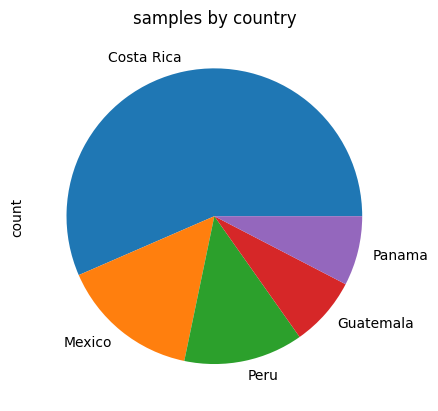

In [20]:
# Make a pie chart of the country frequencies
country_latam_freqs.plot.pie(title='samples by country');

## Shotgun metagenomics ( 7 min)

[**Shotgun sequencing**](https://en.wikipedia.org/wiki/Shotgun_sequencing) randomly fragments and sequences all DNA in a sample, unlike amplicon sequencing, which targets specific regions. When applied to microbial communities, this approach is termed [Shotgun metagenomics](https://en.wikipedia.org/wiki/Shotgun_sequencing#Metagenomic_shotgun_sequencing), also called whole-metagenome shotgun, WMS sequencing or [metagenomics](https://en.wikipedia.org/wiki/Metagenomics). It enables recovery of DNA sequences from all microorganisms—bacteria, archaea, viruses, and eukaryotes—in a given environment.

**Advantages Over 16S rRNA Sequencing**

* **Higher resolution**: Species- or strain-level identification.
* **Functional insights**: Captures genes and metabolic pathways, not just taxonomy.
* **Broader coverage**: Includes all domains of life, not just prokaryotes.
* **Trade-offs**: Higher cost and computational complexity.

**Analysis Strategies**

* **Read-based**: Maps raw sequencing reads to a reference database (e.g., WoL2) for compositional profiling.
* **Assembly-based**: De novo assembles reads into genomes without relying on references (useful for novel species).

**Data Overview**

The processed shotgun data (`shotgun/ogu.biom`) uses the read-based method, where reads were aligned to the **Web of Life 2 (WoL2)** reference database ([Zhu et al., 2019](https://www.nature.com/articles/s41467-019-13443-4)). This table quantifies reads mapped to each reference genome.

Database files: Available at [Microbiom WoL2](https://ftp.microbio.me/pub/wol2/).

In [21]:
# Import the Table class from skbio
from skbio import Table

In [22]:
# Construct full path to latam_ogu biom file
latamogu_path = github_data_path + "shotgun/latam_ogu.biom"

# Load the biom file using skbio's Table class
latam_ogu = Table.read(latamogu_path)
latam_ogu

14933 x 68 <class 'biom.table.Table'> with 90562 nonzero entries (8% dense)

In [23]:
# Convert skbio's Table class to a pandas DataFrame
latam_df = latam_ogu.to_dataframe()

# Show the first few rows of the DataFrame
latam_df.head()

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
G000005825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G000006175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G000006605,0,0,0,0,0,0,0,0,0,0,...,0,0,6.0,0,0,0,0,0,0,0
G000006725,0,1.0,0,0,0,0,0,0,70.0,0,...,0,0,0,0,0,0,0,0,0,0
G000006745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


Each feature in the table corresponds to a reference genome, termed an **Operational Genomic Unit (OGU)** [Zhu et al., 2022](journals.asm.org/doi/full/10.1128/msystems.00167-22). OGUs serve as genomic proxies: while they may not perfectly match the actual microbes in the sample, they provide the closest available reference for mapping sequencing data. The true microbial community members are typically closely related to these reference strains.


In [24]:
# Get table density (number of non-zero entries) of the biom table
latam_ogu.get_table_density()   

0.0891846325351275

In the following section, you will observe a notable difference in `get_table_density` between **16S rRNA** (**0.2%**) and **shotgun metagenomics** (**8.9%**). This disparity reflects fundamental differences between the two sequencing approaches:

* **16S rRNA** sequencing targets a single hypervariable region of the bacterial/archaeal genome, yielding sparse data with limited feature overlap across samples.
* **Shotgun metagenomics** sequences all genomic material (bacteria, archaea, viruses, and functional genes), generating denser datasets with higher feature consistency.

Thus, shotgun data provides more comprehensive microbial profiles with significantly reduced sparsity compared to 16S data.

### Taxonomy classification

The taxonomic assignments for **Operational Genomic Units (OGUs)** are available in the file `ogu.tax`. These classifications correspond to the OGU identifiers present in the filtered BIOM table.

In [25]:
# Construct full path to latam_ogu tax file
latamtax_path = github_data_path + "shotgun/latam_ogu.tax"

# Read the TSV file directly from the URL into a pandas DataFrame
tax_df = pd.read_csv(
    latamtax_path, 
    sep='\t', 
    low_memory=False, 
    header=None,
    index_col=0
    )

# Print the head of the pandas DataFrame to verify
tax_df.iloc[:,:6].head()

,1
0,
G000005825,d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
G000006175,d__Archaea; p__Methanobacteriota_A; c__Methano...
G000006605,d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000006725,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000006745,d__Bacteria; p__Proteobacteria; c__Gammaproteo...


In [26]:
# Extract phylum from taxonomy
tax_df['Phylum'] = tax_df.iloc[:, 0].str.extract(r'p__([^;]+)')
tax_df

,1,Phylum
0,,
G000005825,d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,Firmicutes
G000006175,d__Archaea; p__Methanobacteriota_A; c__Methano...,Methanobacteriota_A
G000006605,d__Bacteria; p__Actinobacteriota; c__Actinomyc...,Actinobacteriota
G000006725,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,Proteobacteria
G000006745,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,Proteobacteria
...,...,...
G902826025,d__Bacteria; p__Actinobacteriota; c__Acidimicr...,Actinobacteriota
G902826465,d__Bacteria; p__Acidobacteriota; c__Vicinamiba...,Acidobacteriota
G902826605,d__Bacteria; p__Acidobacteriota; c__Acidobacte...,Acidobacteriota


In [27]:
# Merge counts (latam_df) with Phylum assignments (tax_df)
latam_df['Phylum'] = tax_df['Phylum']
latam_df['Phylum']

G000005825             Firmicutes
G000006175    Methanobacteriota_A
G000006605       Actinobacteriota
G000006725         Proteobacteria
G000006745         Proteobacteria
                     ...         
G902826025       Actinobacteriota
G902826465        Acidobacteriota
G902826605        Acidobacteriota
G902827015         Proteobacteria
G902827055          Chloroflexota
Name: Phylum, Length: 14933, dtype: object

In [28]:
# View the first few rows of the merged DataFrame
latam_df

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022,Phylum
G000005825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Firmicutes
G000006175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Methanobacteriota_A
G000006605,0,0,0,0,0,0,0,0,0,0,...,0,6.0,0,0,0,0,0,0,0,Actinobacteriota
G000006725,0,1.0,0,0,0,0,0,0,70.0,0,...,0,0,0,0,0,0,0,0,0,Proteobacteria
G000006745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,Proteobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G902826025,23.0,1.0,0,0,0,0,0,0,0,0,...,9.0,4.0,0,0,0,0,0,0,5.0,Actinobacteriota
G902826465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acidobacteriota
G902826605,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acidobacteriota
G902827015,0,0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Proteobacteria


In [29]:
# Group by phylum and sum abundances
df_phylum = latam_df.groupby('Phylum').sum()
df_phylum

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
Phylum,,,,,,,,,,,,,,,,,,,,,
AABM5-125-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acidobacteriota,94.0,58.0,26.0,64.0,268.0,276.0,358.0,631.0,718.0,190.0,...,270.0,9.0,4523.0,54.0,83.0,55.0,11.0,2.0,34.0,2.0
Actinobacteriota,717.0,265.0,139.0,760.0,414.0,1897.0,3216.0,3585.0,2697.0,2945.0,...,16804.0,152630.0,153761.0,896.0,1366.0,984.0,100.0,52.0,276.0,154681.0
Aerophobota,0,0,0,0,0,0,0,0,0,0,...,0,0,11.0,0,0,0,0,0,0,0
Altiarchaeota,0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBA9089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UBP14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verrucomicrobiota,86.0,32.0,41.0,4.0,26.0,1.0,13.0,3.0,43.0,13.0,...,1524.0,6095.0,9667.0,29.0,49.0,26.0,1.0,0,4.0,69604.0


In [31]:
# Transpose df_phylum to have samples as rows
df_phylum_T = df_phylum.T
df_phylum_T

Phylum,AABM5-125-24,Acidobacteriota,Actinobacteriota,Aerophobota,Altiarchaeota,Aquificota,Armatimonadota,Asgardarchaeota,Atribacterota,Aureabacteria,...,Thermotogota,UBA10199,UBA6262,UBA8248,UBA8481,UBA9089,UBP14,Verrucomicrobiota,WOR-3,Zixibacteria
13114.jensen.43.s012,0,94.0,717.0,0,0,0,0,0,0,0,...,0,2.0,0,1.0,0,0,0,86.0,0,0
13114.jensen.43.s013,0,58.0,265.0,0,2.0,0,0,13.0,0,0,...,0,0,0,0,0,0,0,32.0,0,2.0
13114.jensen.43.s014,0,26.0,139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.0,0,0
13114.pinto.63.s001,0,64.0,760.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0,0
13114.pinto.63.s002,0,268.0,414.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,55.0,984.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.0,0,0
13114.zaneveld.9.s010,0,11.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
13114.zaneveld.9.s011,0,2.0,52.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,34.0,276.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0,0


In [32]:
# Create datadrame with samples from Latin America with metadata empo_2
sample_to_empo = latam_samples['empo_2']
sample_to_empo

sample_name
13114.jensen.43.s012         Saline
13114.jensen.43.s013         Saline
13114.jensen.43.s014         Saline
13114.pinto.62.s001      Non-saline
13114.pinto.62.s002      Non-saline
                            ...    
13114.zaneveld.9.s006        Animal
13114.zaneveld.9.s010        Animal
13114.zaneveld.9.s011        Animal
13114.zaneveld.9.s012        Animal
13114.zaneveld.9.s022        Saline
Name: empo_2, Length: 92, dtype: object

In [33]:
# Add empo_2 column to df_phylum_T
df_phylum_T['empo_2'] = sample_to_empo
df_phylum_T

Phylum,AABM5-125-24,Acidobacteriota,Actinobacteriota,Aerophobota,Altiarchaeota,Aquificota,Armatimonadota,Asgardarchaeota,Atribacterota,Aureabacteria,...,UBA10199,UBA6262,UBA8248,UBA8481,UBA9089,UBP14,Verrucomicrobiota,WOR-3,Zixibacteria,empo_2
13114.jensen.43.s012,0,94.0,717.0,0,0,0,0,0,0,0,...,2.0,0,1.0,0,0,0,86.0,0,0,Saline
13114.jensen.43.s013,0,58.0,265.0,0,2.0,0,0,13.0,0,0,...,0,0,0,0,0,0,32.0,0,2.0,Saline
13114.jensen.43.s014,0,26.0,139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41.0,0,0,Saline
13114.pinto.63.s001,0,64.0,760.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,0,0,Plant
13114.pinto.63.s002,0,268.0,414.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.0,0,0,Plant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,55.0,984.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.0,0,0,Animal
13114.zaneveld.9.s010,0,11.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,0,Animal
13114.zaneveld.9.s011,0,2.0,52.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Animal
13114.zaneveld.9.s012,0,34.0,276.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,0,0,Animal


In [35]:
#  Group by empo_2 and sum
df_grouped = df_phylum_T.groupby('empo_2').sum().T  # Transpose to return phylum as rows
df_grouped

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
AABM5-125-24,0,1.0,0,1.0
Acidobacteriota,239.0,8942.0,5748.0,25232.0
Actinobacteriota,3674.0,147840.0,1156436.0,1234768.0
Aerophobota,0,0,0,98.0
Altiarchaeota,0,1.0,0,2.0
...,...,...,...,...
UBA9089,0,0,0,0
UBP14,0,0,0,0
Verrucomicrobiota,109.0,3540.0,936.0,125818.0


In [36]:
# Select the 10 most abundant phyla in total
top10_phyla = df_grouped.sum(axis=1).nlargest(10).index     # Get the top 10 phyla
df_top10 = df_grouped.loc[top10_phyla]                      # Create a new DataFrame with only the top 10 phyla
df_top10

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
Proteobacteria,19720.0,160531.0,3995378.0,5944467.0
SAR324,10.0,0,290.0,4118309.0
Actinobacteriota,3674.0,147840.0,1156436.0,1234768.0
Thermoproteota,24.0,2191.0,443.0,1383277.0
Bacteroidota,46321.0,17536.0,491310.0,527655.0
Thermoplasmatota,1.0,2.0,22.0,1059048.0
Marinisomatota,0,0,54.0,1018655.0
Cyanobacteria,785.0,109873.0,9045.0,757795.0
Firmicutes,4660.0,1682.0,303859.0,117871.0


In [37]:
# Convert to relative abundance by empo_2 group
df_rel = df_top10.div(df_top10.sum(axis=0), axis=1)
df_rel

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
Proteobacteria,0.261681,0.363153,0.669873,0.361378
SAR324,0.000133,0.0,0.000049,0.250361
Actinobacteriota,0.048753,0.334443,0.19389,0.075064
Thermoproteota,0.000318,0.004956,0.000074,0.084093
Bacteroidota,0.614671,0.03967,0.082374,0.032077
Thermoplasmatota,0.000013,0.000005,0.000004,0.064382
Marinisomatota,0.0,0.0,0.000009,0.061926
Cyanobacteria,0.010417,0.248554,0.001517,0.046068
Firmicutes,0.061837,0.003805,0.050946,0.007166


In [38]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

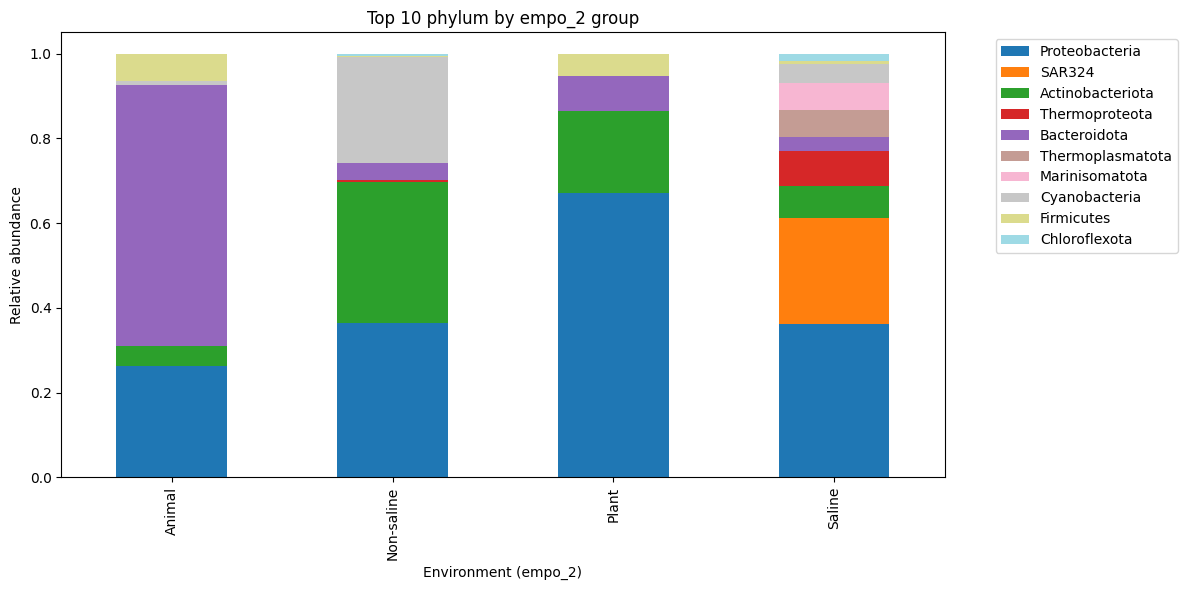

In [39]:
# Create a stacked bar plot of phylum relative abundances
df_rel.T.plot(
    kind='bar',                                 # Specify bar plot type
    stacked=True,                               # Stack bars to show composition
    figsize=(12,6),                             # Set figure dimensions (12" wide x 6" tall)
    colormap='tab20')                           # Use a qualitative colormap with 20 distinct colors

# Y-axis label
plt.ylabel("Relative abundance")

# X-axis label  
plt.xlabel("Environment (empo_2)") 

# Plot title
plt.title("Top 10 phylum by empo_2 group")  

# Legend configuration
plt.legend(
    bbox_to_anchor=(1.05, 1),                   # Position legend outside plot (1.05x right, 1y up)
    loc='upper left')                           # Anchor point for legend positioning

# Adjust layout to prevent label clipping  
plt.tight_layout() 

# Display the plot
plt.show()

**Identification & Classification**

The **SAR324** group, visible in **saline** samples, represents a candidate bacterial phylum - known primarily through environmental DNA sequencing rather than laboratory cultivation. The designation "**SAR**" originates from its initial phylogenetic association with the **SAR supergroup** (comprising Stramenopiles, Alveolates, and Rhizaria), while "**324**" refers to its **unique identifier** in early marine metagenomic studies.

As part of microbial dark matter, SAR324 exemplifies microorganisms whose ecological roles are inferred from genomic data despite remaining uncultured.

**Ecological Distribution**

SAR324 is predominantly found in:

* Deep ocean waters (mesopelagic to bathypelagic zones)
* Oxygen minimum zones (OMZs)
* Hydrothermal vent plumes
* Marine sediments (less frequently)

**Functional Significance**

Genomic analyses reveal SAR324's potential importance in:

1. Carbon cycling:
   * Possesses genes for CO<sub>2</sub> fixation via the Calvin-Benson-Bassham cycle
2. Sulfur metabolism:
   * Contains sulfur oxidation (sox) gene clusters
3. Chemolithoautotrophy:
   * Likely oxidizes reduced sulfur compounds (e.g., thiosulfate) for energy

**Key reference**
[Delta-proteobacterial SAR324 group in hydrothermal plumes on the South Mid-Atlantic Ridge](https://doi.org/10.1038/srep22842)


### Phylogeny: A High-Resolution Approach to Microbial Relationships

While traditional taxonomy provides a descriptive and operational classification system, its 7–8 standard ranks often lack the resolution needed to capture the diversity of modern microbial genomics (with >2 million genomes now in NCBI). For finer-scale evolutionary relationships, phylogeny offers a powerful alternative.

A [**phylogenetic tree**](https://en.wikipedia.org/wiki/Phylogenetic_tree) is a graph representing evolutionary relationships among organisms, all descending from a common ancestor. Key features include:

* **Topology**: The branching pattern reflects the order of speciation events.
* **Branch lengths**: Quantify evolutionary divergence (e.g., substitutions per site).

This quantitative framework makes phylogeny ideal for modeling microbial relationships with precision.

**Practical Implementation**

The WoL2 reference phylogeny (`ogu.nwk`) uses the [Newick format](https://en.wikipedia.org/wiki/Newick_format) and can be parsed with scikit-bio’s [`TreeNode`](https://scikit.bio/docs/latest/generated/skbio.tree.TreeNode.html) class.

In [54]:
# Import TreeNode class from skbio
from skbio import TreeNode

In [ ]:
# Construct full path to latam_ogu nwk file
latamtree_path = github_data_path + "shotgun/latam_ogu.nwk"

In [ ]:
# Create TreeNode object from the newick file path
tree_latam = TreeNode.read(latamtree_path)
tree_latam

<TreeNode, name: N1, internal node count: 14326, tips count: 14933>

**Working with Large Phylogenetic Trees**

Given the tree's size, we cannot visualize it in its entirety. Instead, we will:

1. **Select an arbitrary tip**: The first OGU in the list (`G000005825`).
2. **Trace its ancestry**: Identify its parent and grandparent nodes.
3. **Extract a subclade**: Display a small descendant group from this lineage for focused analysis.

This approach allows us to examine evolutionary relationships at a manageable scale while preserving context.

In [ ]:
# Show the tree structure of G000005825 in format of ASCII art
print(tree_latam.find('G000005825').parent.parent.ascii_art())

                    /-G000005825
          /N8376---|
         |         |          /-G000513115
         |          \N8873---|
         |                   |          /-G000513095
-N7879---|                    \N9376---|
         |                              \-G000513135
         |
         |          /-G001310555
          \N8377---|
                   |          /-G001590785
                    \N8874---|
                             |          /-G000292245
                              \N9377---|
                                        \-G001038565


This structured framework enables multiple downstream analyses that will be explored in subsequent sections.

> Note: The amplicon data includes a reference phylogeny (`16s.nwk` in the `amplicon` directory), which we will examine in a later section.

**Key Output Files**

After processing and filtering the BIOM files, we obtain two essential components for visualization:

* `latam_samples.tsv` - Sample metadata
* `latam_ogu.nwk` - Phylogenetic tree

These files are compatible with [Microreact](https://microreact.org/), an interactive platform for exploring phylogenetic relationships alongside metadata. Key features include:

* Dynamic visualization of large datasets
* Cluster identification and pattern discovery
* Enhanced data interpretation through interactive tools

**Explore our dataset**

[**EMP500 Latin America samples**](https://microreact.org/project/bXyNWcLQZsAVsVFvuDVYr8-emp500-latino-america)

## Google Colab setup

To use Google Colab and directly mount the shared Google Drive folder containing data files, please execute the following code.

In [50]:
# View header of the README file
# !head $HOME/README.md
HOME = '/home/david/Documents/Code/github/scikit-bio/class'
!head $HOME/README.md

# scikit-bio-tutorials

Interactive tutorials for using scikit-bio in biological research.

This repository hosts tutorial materials for the ISMB 2024 conference.

- https://www.iscb.org/ismb2024/programme-schedule/tutorials#ip3

The tutorial is broken down as follows, Google Colab notebooks can be launched via the following links



### Upload the data to your drive

#### Step 1: Download and Upload the Data

While cell [2] is running:

1. Download this compressed file to your local computer: `EMP500_Data.zip`
    * [https://drive.google.com/file/d/1u5XywaZGfHq0rvyA6NzDqBxev7OtwdNR/view?usp=drive_link](https://drive.google.com/file/d/1u5XywaZGfHq0rvyA6NzDqBxev7OtwdNR/view?usp=drive_link)
2. Upload the ZIP file to the **root directory** of your Google Drive

#### Step 2: Extract Files in Google Drive

Using Zip Extractor:

1. In Google Drive, locate the uploaded ZIP file
2. Right-click → Open with → Zip Extractor
3. If prompted, grant permission to access your Drive
4. Set destination folder (recommended: create new folder "EMP500_Data")
5. Click Extract Now

#### Step 3: Importing Essential Python Libraries

We begin by importing core scientific computing libraries:

In [52]:
import numpy as np                  # Fundamental package for numerical computing:
                                    # - Array/matrix operations
                                    # - Mathematical functions
                                    # - Logical operations and filtering

import pandas as pd                 # Data manipulation and analysis:
                                    # - DataFrames for structured data
                                    # - Reading/writing CSV/TSV files
                                    # - Data cleaning and transformation

import matplotlib.pyplot as plt     # Comprehensive plotting system:
                                    # - Publication-quality visualizations
                                    # - Customizable figures and subplots
                                    # - Support for various plot types

#### Step 4: Import drive module from Google Colab

This module allows you to mount Google Drive in your Colab environment

In [53]:
# Import drive module from google.colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Specify your remote directory
# HOME = '/content/drive/MyDrive/emp500' # Jeanett
# HOME = '/content/drive/MyDrive/sci-kit-bio_local/emp500/Data' #Nelly
HOME = '/content/drive/MyDrive/scikit-bio_class/emp500' # David

#### Step 5: Verify Directory Contents

To check if a directory exists and view its contents, you can list files in your Home directory using:

In [ ]:
!ls $HOME

Also you can use the path of your directory to check the content  